In [1]:
# %load common.py
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

import statsmodels.api as sm

import seaborn as sns

%matplotlib inline

def ols(y, x):
    return sm.OLS(y, sm.add_constant(x)).fit()

def load_autos_dataset():
    auto = pd.read_csv('./data/Auto.csv', na_values='?', index_col='name')
    auto = auto.dropna()
    return auto

def load_boston_dataset():
    rdataset = sm.datasets.get_rdataset('Boston', 'MASS', True)
    return rdataset.data

def load_carseats_dataset():
    return pd.read_csv('./data/Carseats.csv', index_col=0)

In [8]:
advertising = pd.read_csv('./data/Advertising.csv', index_col=0)

In [9]:
advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
res = ols(advertising['Sales'], advertising['TV'])
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 24 Sep 2016   Prob (F-statistic):           1.47e-42
Time:                        13:41:29   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000         6.130     7.935
TV             0.0475      0.003     17.668      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
advertising.shape

(200, 4)

In [12]:
rse = np.sqrt(np.sum(np.square(advertising['Sales'] - res.fittedvalues))/198)
rse

3.2586563686504628

In [13]:
result = ols(advertising['Sales'], advertising.drop('Sales', axis=1))
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 24 Sep 2016   Prob (F-statistic):           1.58e-96
Time:                        13:57:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
np.corrcoef(advertising.T)

array([[ 1.        ,  0.05480866,  0.05664787,  0.78222442],
       [ 0.05480866,  1.        ,  0.35410375,  0.57622257],
       [ 0.05664787,  0.35410375,  1.        ,  0.22829903],
       [ 0.78222442,  0.57622257,  0.22829903,  1.        ]])

In [2]:
credit = pd.read_csv('./data/Credit.csv', index_col=0)

In [20]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [28]:
credit['gender_indicator'] = credit['Gender'].map(lambda x: 1 if x == 'Female' else 0)

In [29]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,gender_indicator
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [30]:
result = ols(credit['Balance'], credit['gender_indicator'])
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Mon, 26 Sep 2016   Prob (F-statistic):              0.669
Time:                        10:22:04   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const              509.8031     33.128     15.389      0.000       444.675   574.931
gender_indicator    19.7331     46.051      0.429      0.669       -70.801   110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
advertising['TV x Radio'] = advertising['TV'] * advertising['Radio']
result = ols(advertising['Sales'], advertising[['TV', 'Radio', 'TV x Radio']])
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Mon, 26 Sep 2016   Prob (F-statistic):          6.68e-146
Time:                        13:28:14   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.000         6.261     7.239
TV             0.0191      0.002     12.699      0.000         0.016     0.022
Radio          0.0289      0.009      3.241      0.001         0.011     0.046
TV x Radio     0.0011   5.24e-05     20.727      0.000         0.001     0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,gender_indicator
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0


In [3]:
credit['Student_I'] = credit['Student'].map(lambda x: 1 if x == 'Yes' else 0)
result = ols(credit['Balance'], credit[['Income', 'Student_I']])
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Mon, 26 Sep 2016   Prob (F-statistic):           9.64e-29
Time:                        14:29:25   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        211.1430     32.457      6.505      0.000       147.333   274.952
Income         5.9843      0.557     10.751      0.000         4.890     7.079
Student_I    382.6705     65.311      5.859      0.000       254.272   511.069
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

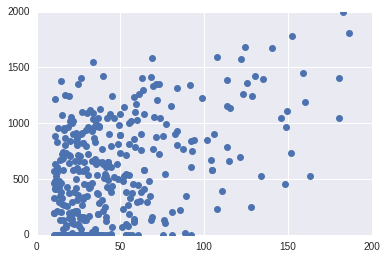

In [7]:
plt.plot(credit['Income'], credit['Balance'], 'o')

In [8]:
credit['Income'].describe()

count    400.000000
mean      45.218885
std       35.244273
min       10.354000
25%       21.007250
50%       33.115500
75%       57.470750
max      186.634000
Name: Income, dtype: float64

In [9]:
x = np.linspace(0, 200, 100)
y1 = result.params['const'] + x * result.params['Income']
y2 = result.params['const'] + result.params['Student_I'] + x * result.params['Income']

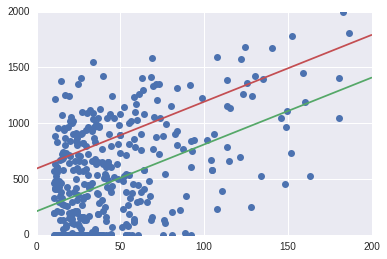

In [11]:
plt.plot(credit['Income'], credit['Balance'], 'o')
plt.plot(x, y1, '-')
plt.plot(x, y2, '-')

In [12]:
credit['Interaction'] = credit['Income'] * credit['Student_I']
result = ols(credit['Balance'], credit[['Income', 'Student_I', 'Interaction']])
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Mon, 26 Sep 2016   Prob (F-statistic):           4.94e-28
Time:                        14:38:02   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const         200.6232     33.698      5.953      0.000       134.373   266.873
Income          6.2182      0.592     10.502      0.000         5.054     7.382
Student_I     476.6758    104.351      4.568      0.000       271.524   681.827
Interaction    -1.9992      1.731     -1.155      0.249        -5.403     1.404
==============================================================================
Omnibus:                      107.788   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.158
Skew:                           0.228   Prob(JB):                     1.54e-05
Kurtosis:                       1.941   Cond. No.                         309.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

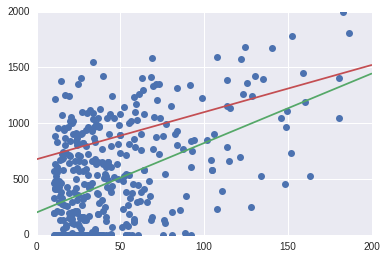

In [13]:
p = result.params
y1 = p['const'] + p['Income'] * x
y2 = p['const'] + p['Student_I'] + (p['Income'] + p['Interaction']) * x
plt.plot(credit['Income'], credit['Balance'], 'o')
plt.plot(x, y1)
plt.plot(x, y2)

In [14]:
auto = load_autos_dataset()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


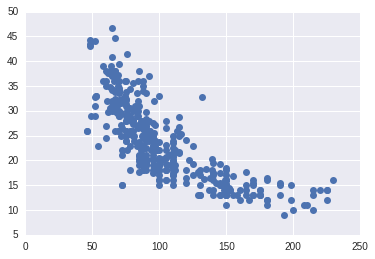

In [15]:
plt.plot(auto['horsepower'], auto['mpg'], 'o')

In [16]:
auto['horsepower^2'] = np.square(auto['horsepower'])
linear_res = ols(auto['mpg'], auto['horsepower'])
square_res = ols(auto['mpg'], auto[['horsepower', 'horsepower^2']])
x = np.linspace(25, 250, 100)

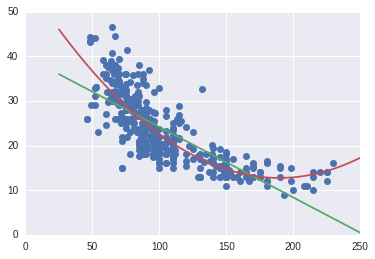

In [26]:
y1 = linear_res.params['const'] + linear_res.params['horsepower'] * x
y2 = square_res.params['const'] + square_res.params['horsepower'] * x + square_res.params['horsepower^2'] * x * x
plt.plot(auto['horsepower'], auto['mpg'], 'o')
plt.plot(x, y1)
plt.plot(x, y2)

In [28]:
fifth = np.polyfit(auto['horsepower'], auto['mpg'], 5)
fifth

array([  3.32955307e-09,  -2.28107628e-06,   5.93108571e-04,
        -7.14240777e-02,   3.70010899e+00,  -3.22305601e+01])

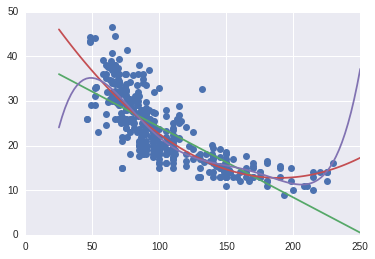

In [30]:
y5 = np.polyval(fifth, x)
plt.plot(auto['horsepower'], auto['mpg'], 'o')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y5)